## Construction of n-th order diagrams for the case of gluons

Let's apply what we developed specifically for the case of gluons. Remember that the way that we specify for the case that we are in is with the canonical diagrams, and as a consequence of it the number of different particles. All the higher order diagrams will be constructed starting from those diagrams. These diagrams will be defined in a separate python file to avoid cluster, and being able to use it in other programs.

There are many thing that it's important to take into account.
- Although there is only one type of particle, due to the presence of instant paths, this will be interpreted as a new type of particle in the code.
- To represent counter terms, we need to be able to detect loops and formalice a definition within our stablished arrays.

For the second problem there is a easy fix, let's define the path `[i, i]`, with i the index for the point where the counter term dot will be located within the points of the diagram. This way when a loop is detected, a new diagram with `[i, i]` instead of the loop will be added.

### Import packages

The only package that need to be imported is numpy, since the all the functions used and canonical diagrams will be coming from another python file.

In [1]:
import numpy as np
from tqdm import tqdm
#Import the cannonical gluon diagrams
from functions.can_diagrams.gluon_diagrams import * 
from functions.gluon_functions import *

In [2]:
type_proc = [[2, 2]]
till_order = 6

In [3]:
points_2nd, paths_2nd, count_2nd = combine_diagrams_order([can_points_1st], [can_paths_1st], [can_number_1st], type_proc, till_order, offset=0)
points2, paths2, count2 = group_diagrams(points_2nd, paths_2nd, count_2nd)

100%|██████████| 1/1 [00:00<00:00, 27776.85it/s]


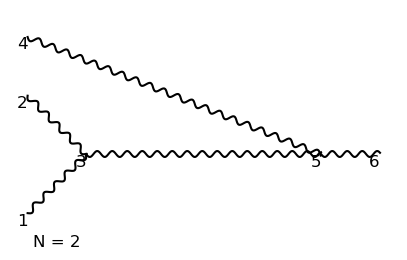

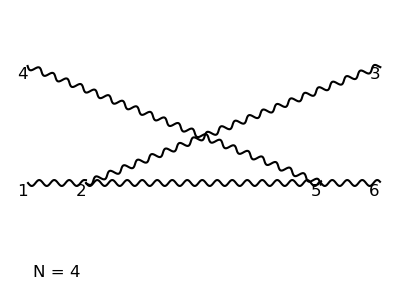

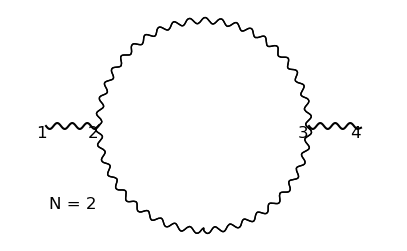

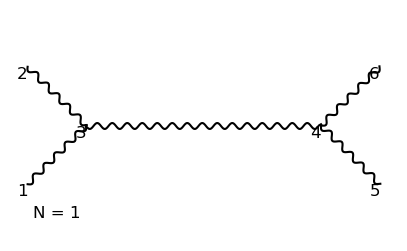

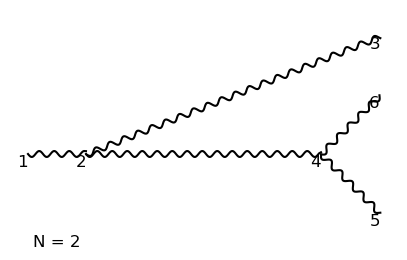

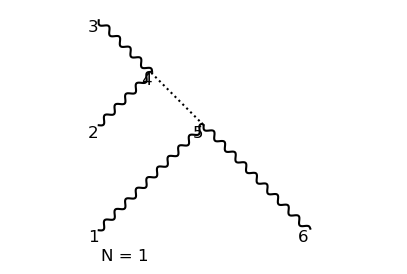

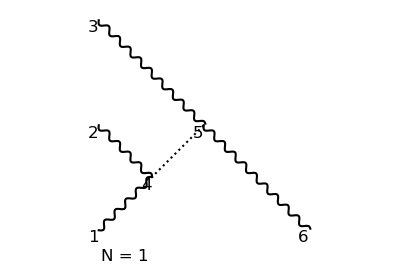

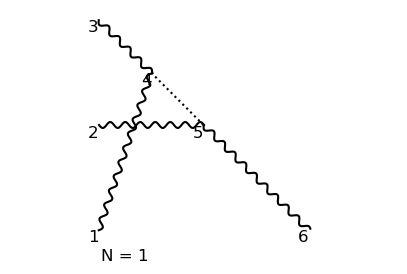

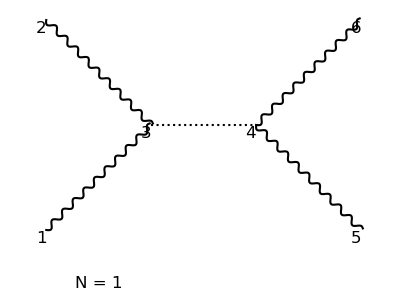

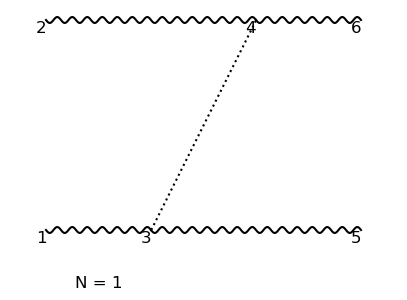

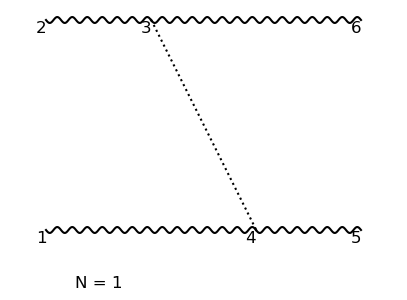

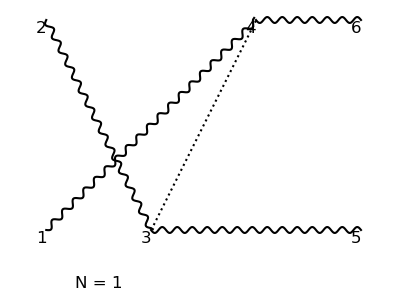

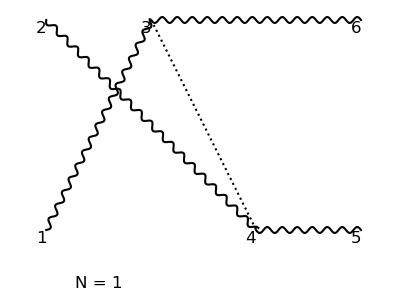

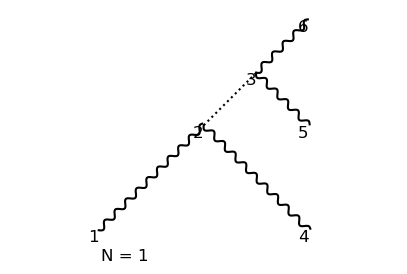

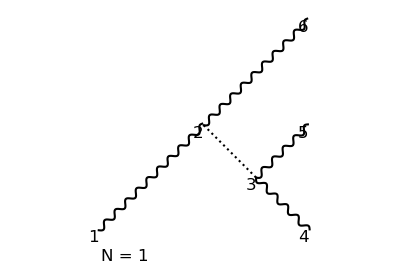

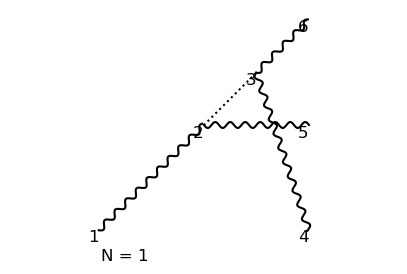

In [4]:
for i in range(len(points2)):
    in_out_paths_2 = in_out_paths(paths2[i])
    represent_diagram(reposition_diagram(points2[i], in_out_paths_2), paths2[i], index=True, line=["photon", "dotted"], colors=["black", "black"], number=count2[i])

In [5]:
points_3rd, paths_3rd, count_3rd = combine_diagrams_order([can_points_1st, points2], [can_paths_1st ,paths2], [can_number_1st, count2],type_proc, till_order, offset=0)
points3, paths3, count3 = group_diagrams(points_3rd, paths_3rd, count_3rd)

100%|██████████| 1/1 [00:00<00:00, 14.68it/s]


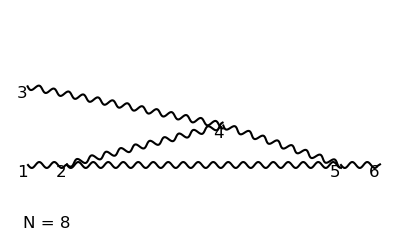

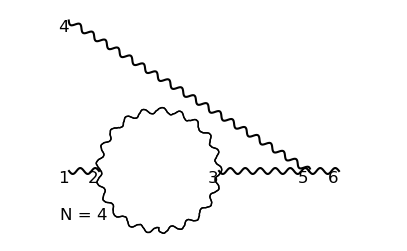

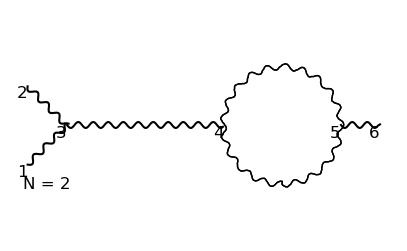

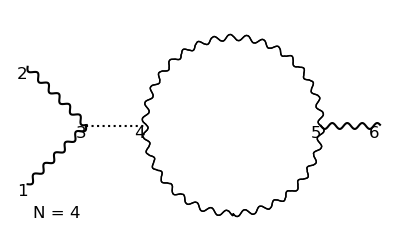

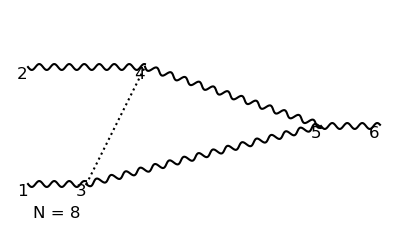

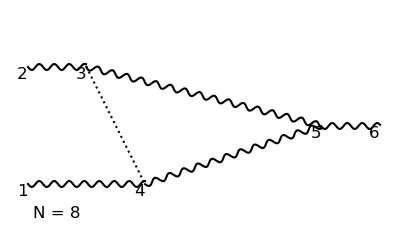

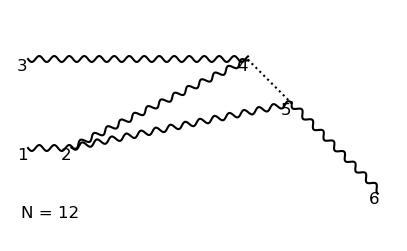

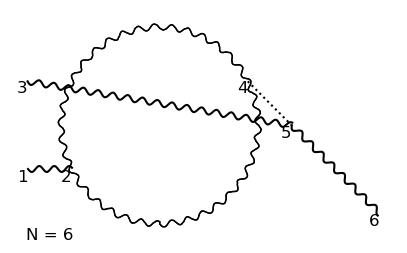

In [6]:
for i in range(len(paths3)):
    in_out_paths_3 = in_out_paths(paths3[i])
    inp = 0
    out = 0
    for j in range(len(paths3[0])):
        inp += len(np.trim_zeros(in_out_paths_3[j, 0]))
        out += len(np.trim_zeros(in_out_paths_3[j, 1]))
    if inp == 1 and out == 2:
        points3[i], paths3[i] = detect_superposition(points3[i], paths3[i])
        represent_diagram(reposition_diagram(points3[i], in_out_paths_3), paths3[i], index=True, line=["photon", "dotted"], colors=["black", "black"], number=count3[i])

In [7]:
points_4th, paths_4th, count_4th = combine_diagrams_order([can_points_1st, points2, points3], [can_paths_1st, paths2, paths3], [can_number_1st, count2, count3],type_proc, till_order, offset=0)
points4, paths4, count4 = group_diagrams(points_4th, paths_4th, count_4th)

100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


In [8]:
print(f"reduced from {len(points_4th)} to {len(points4)}")

reduced from 6912 to 591


In [9]:
points_5th, paths_5th, count_5th = combine_diagrams_order([can_points_1st, points2, points3, points4], [can_paths_1st, paths2, paths3, paths4], [can_number_1st, count2, count3, count4],type_proc, till_order, offset=0)
points5, paths5, count5 = group_diagrams(points_5th, paths_5th, count_5th)

100%|██████████| 1/1 [00:07<00:00,  7.98s/it]


/Users/zhuozhuoliu/Documents/Uni/TFG/edp-renormalization/python/functions/gluon_functions.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(5,3))


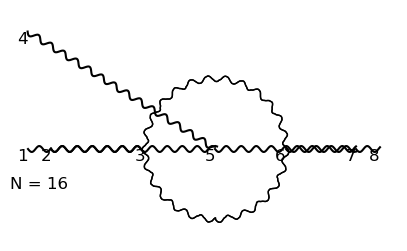

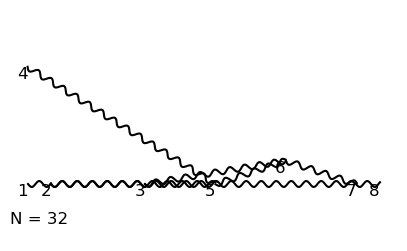

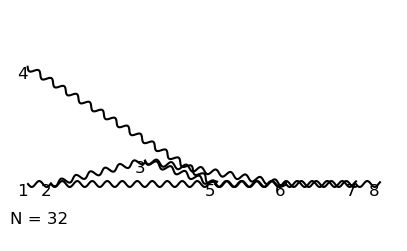

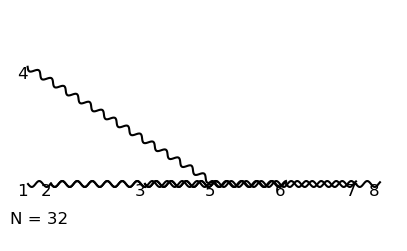

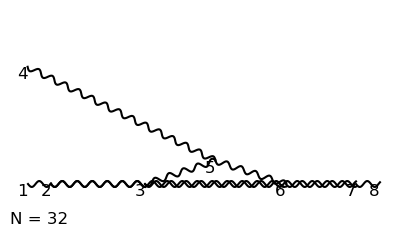

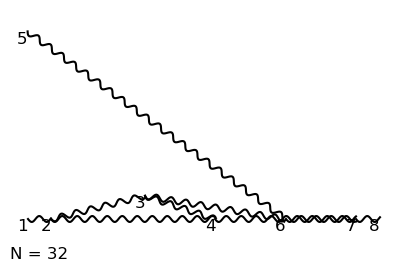

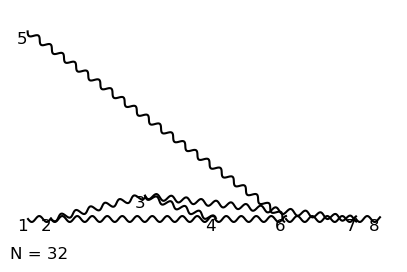

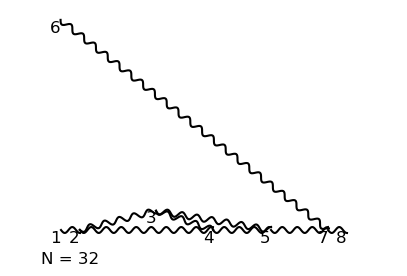

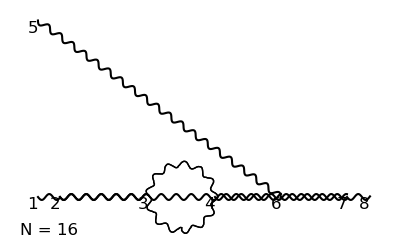

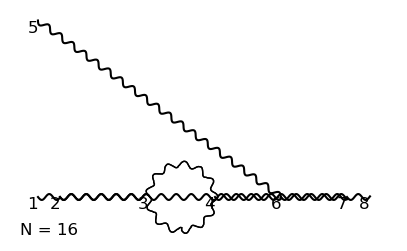

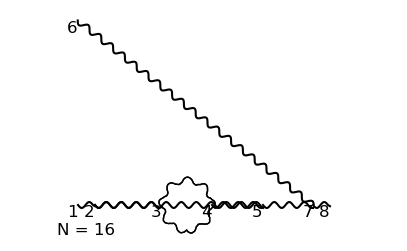

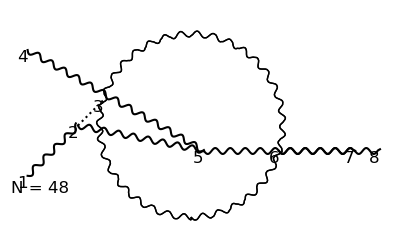

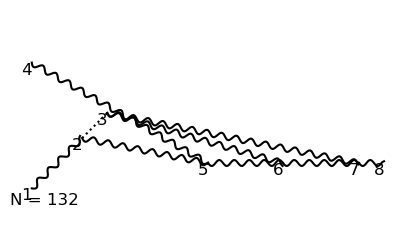

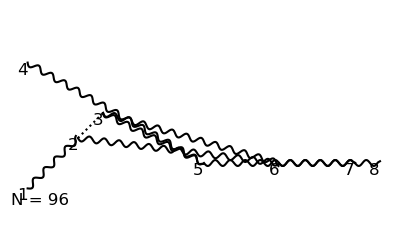

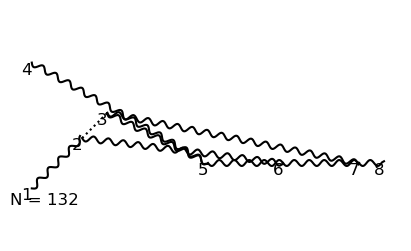

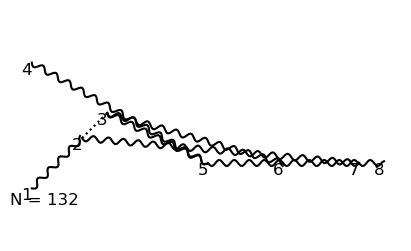

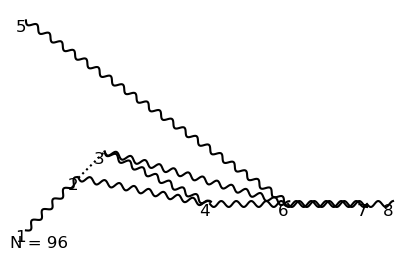

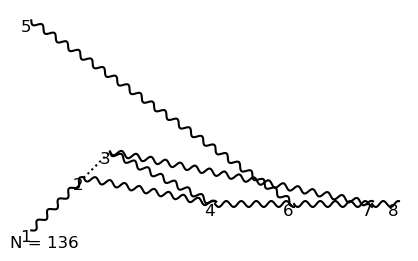

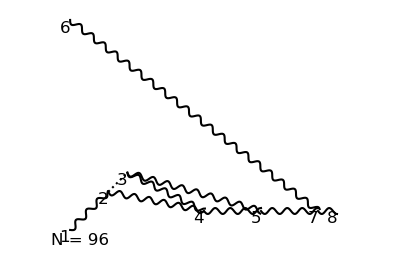

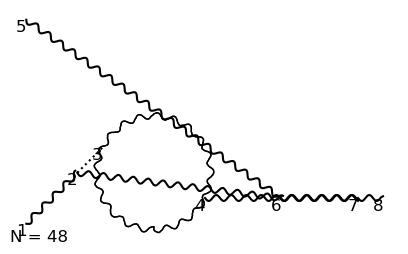

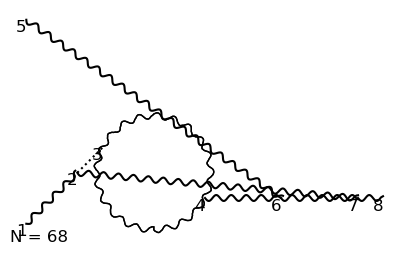

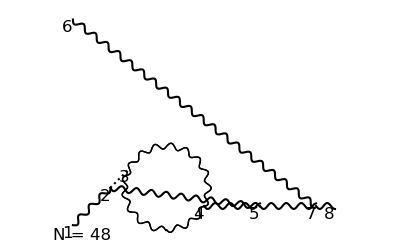

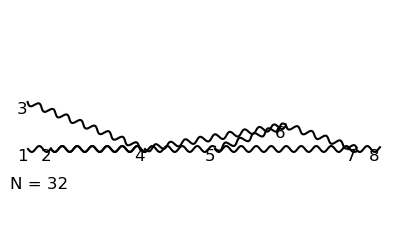

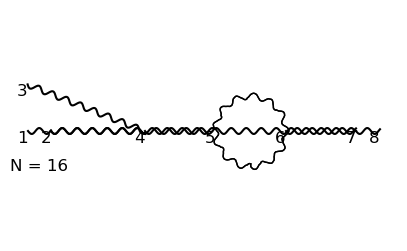

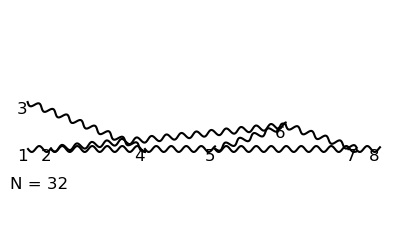

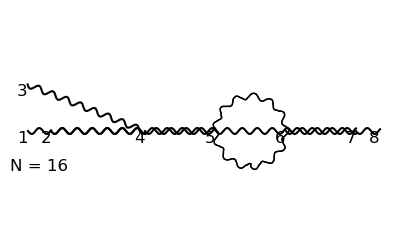

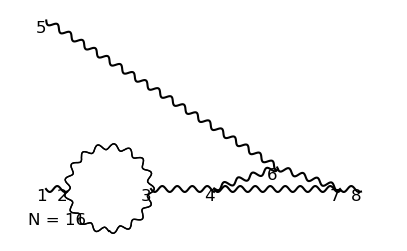

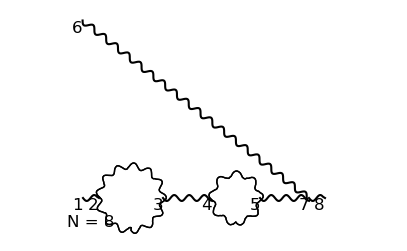

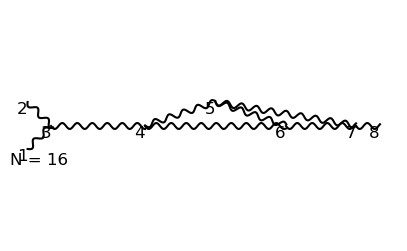

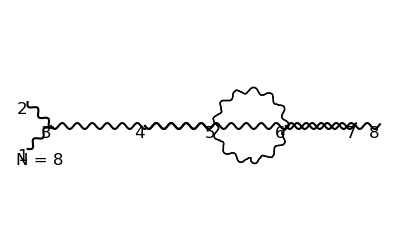

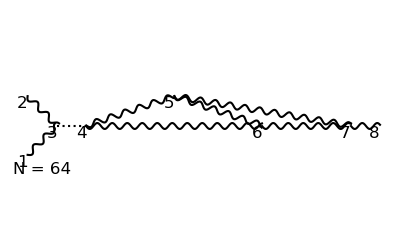

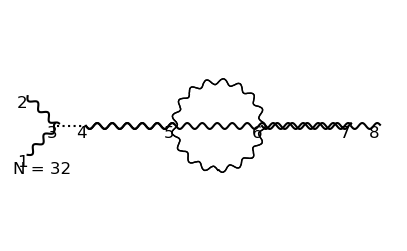

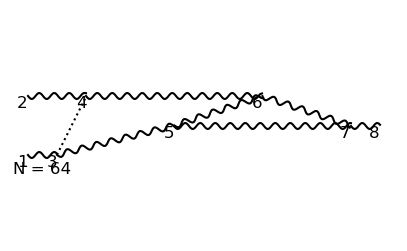

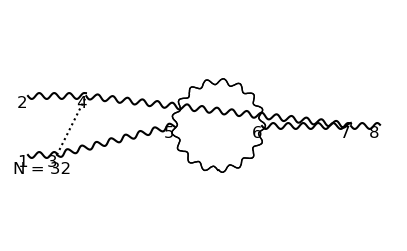

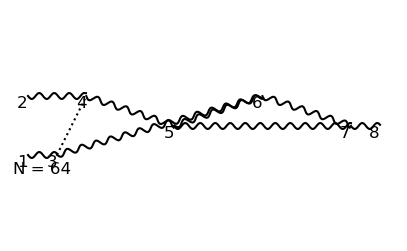

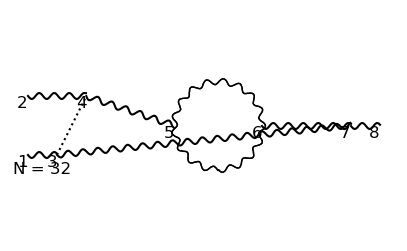

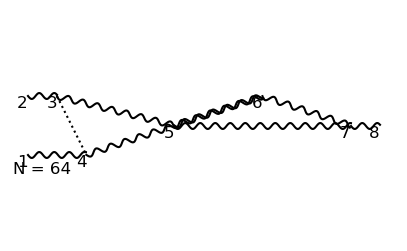

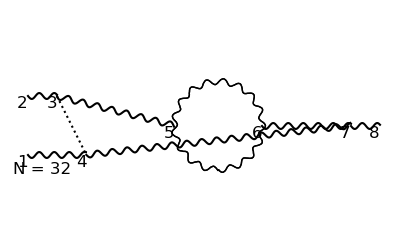

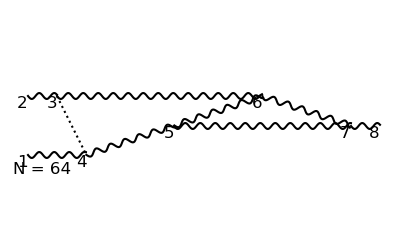

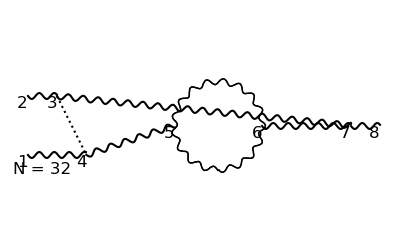

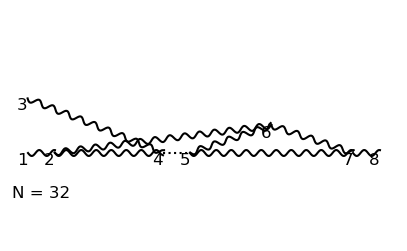

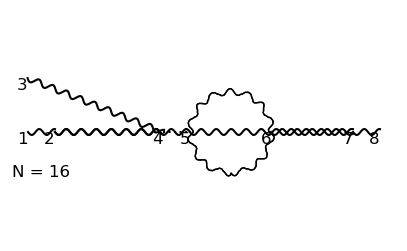

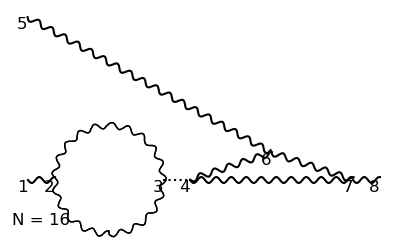

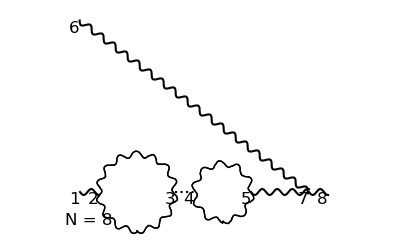

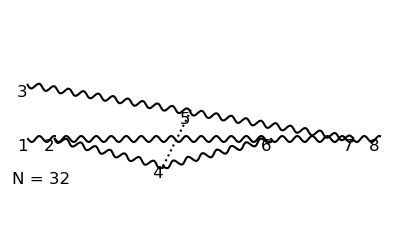

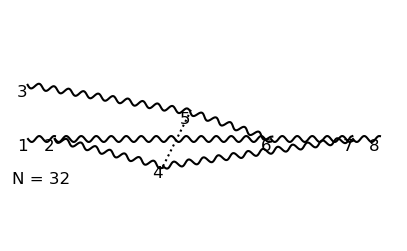

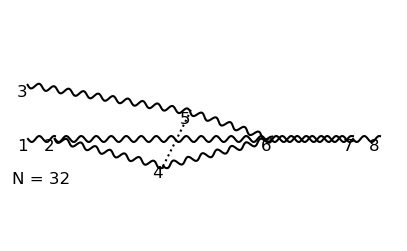

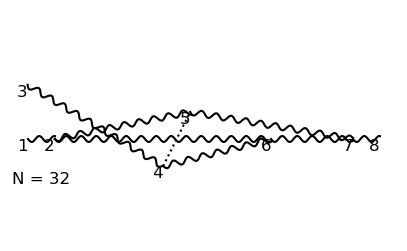

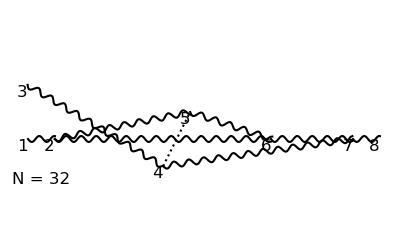

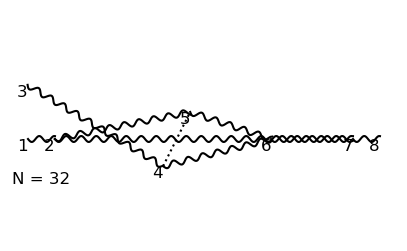

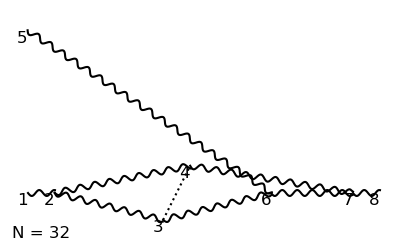

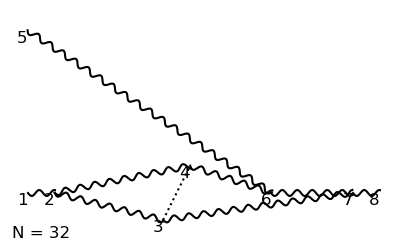

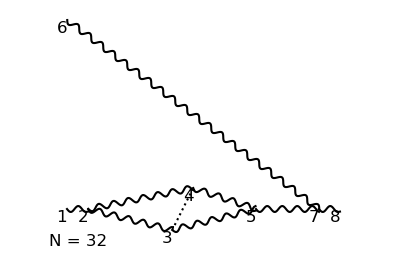

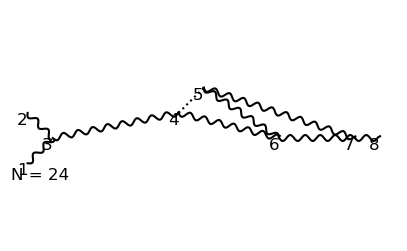

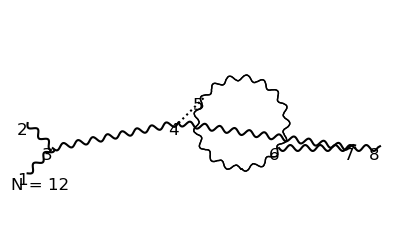

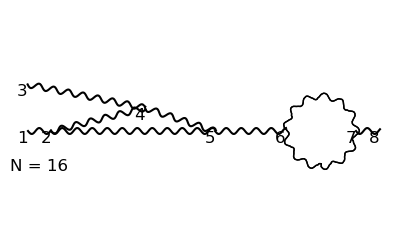

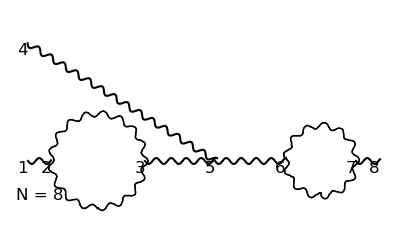

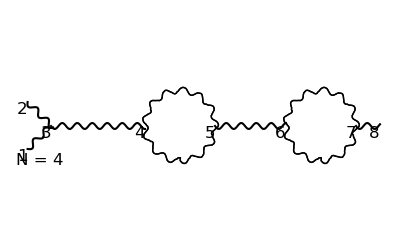

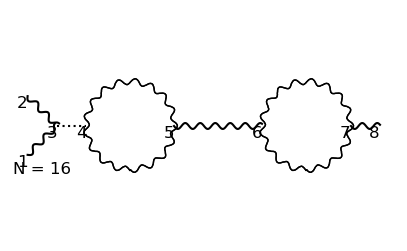

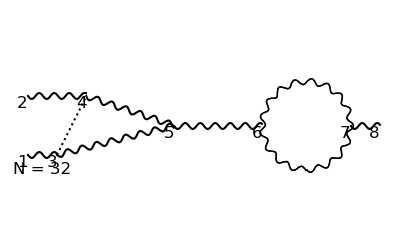

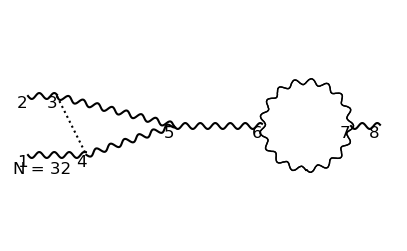

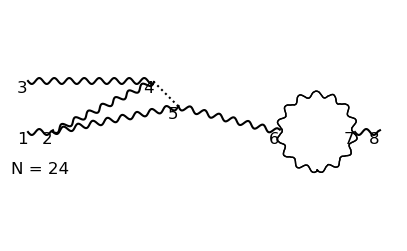

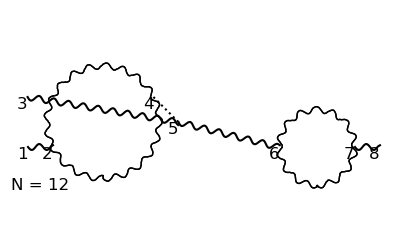

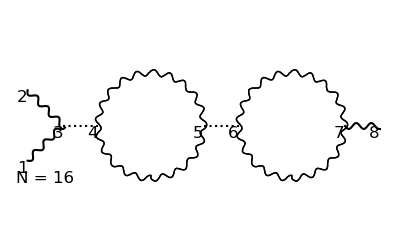

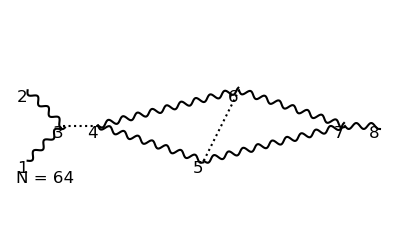

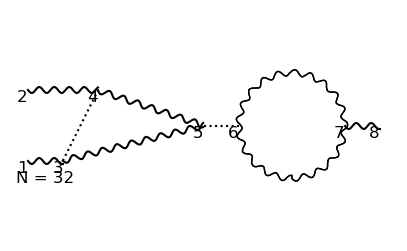

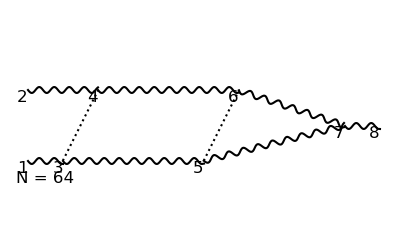

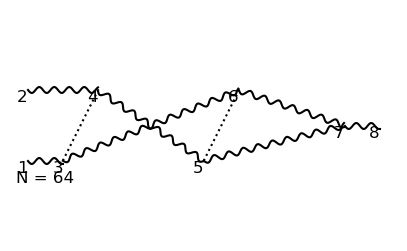

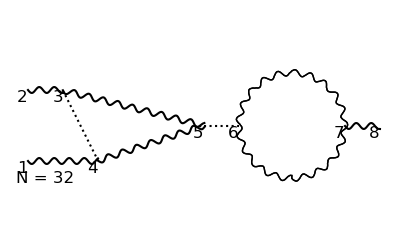

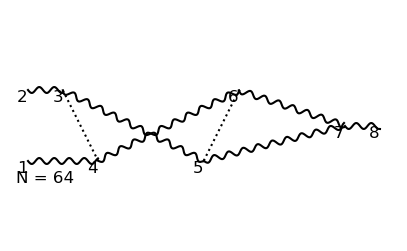

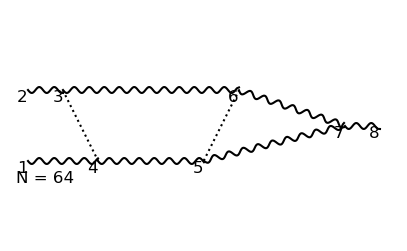

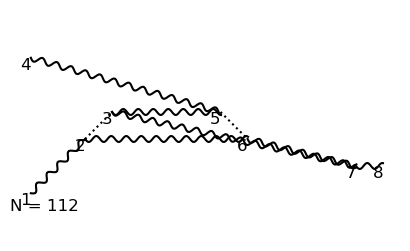

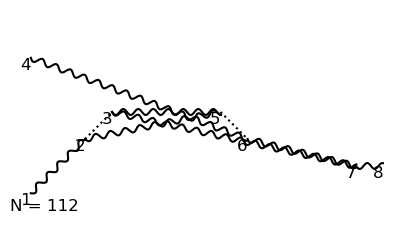

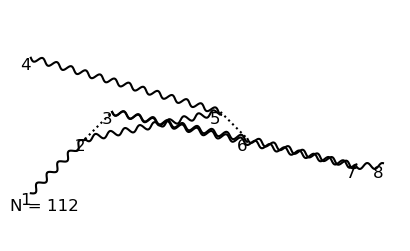

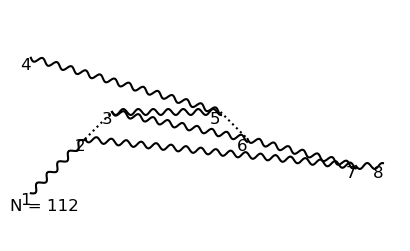

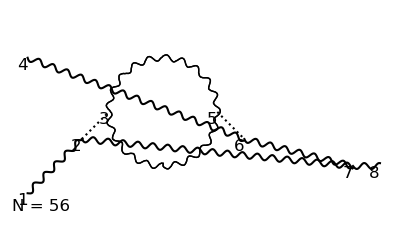

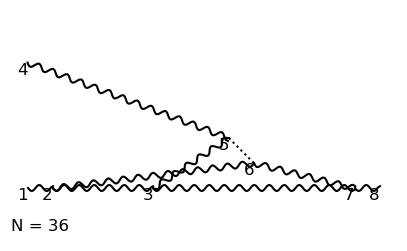

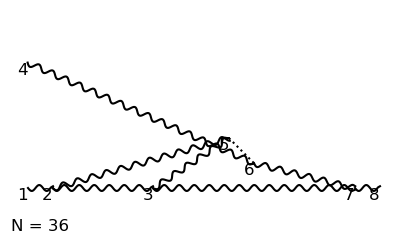

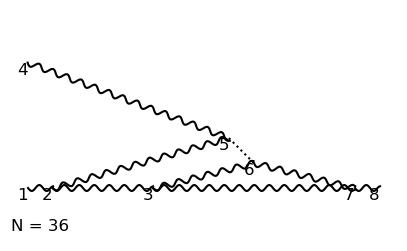

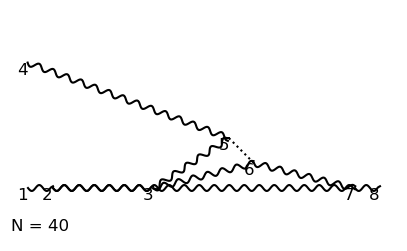

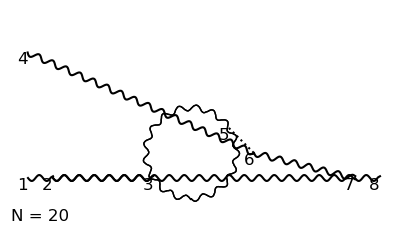

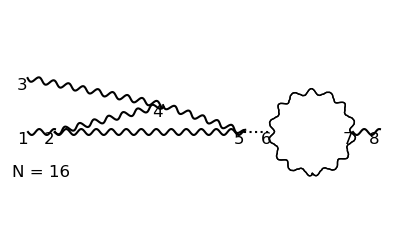

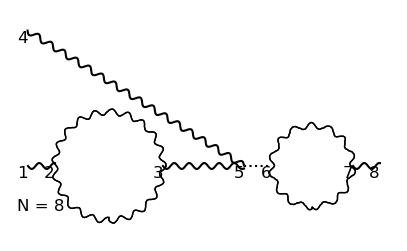

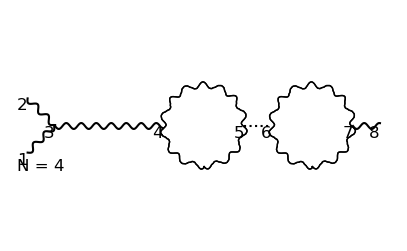

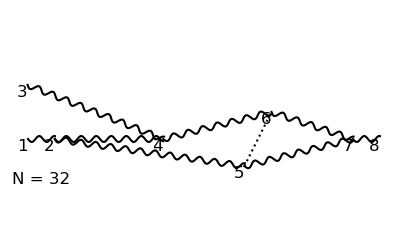

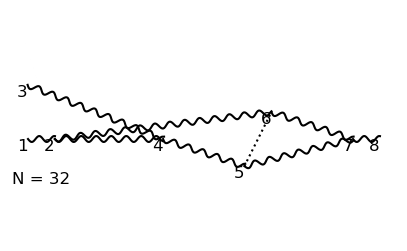

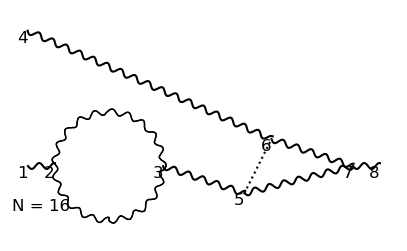

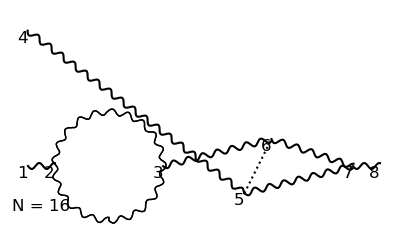

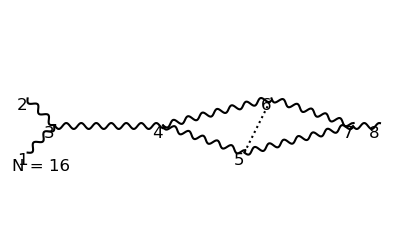

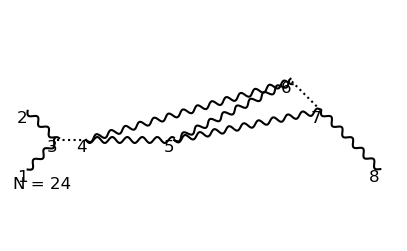

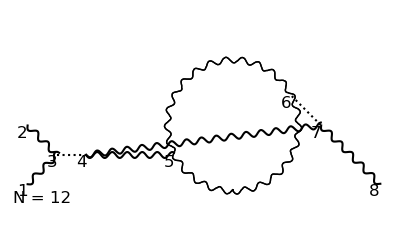

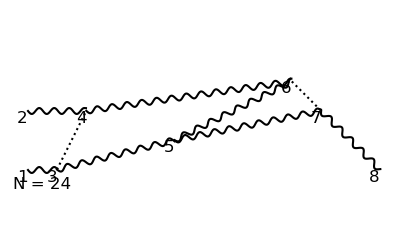

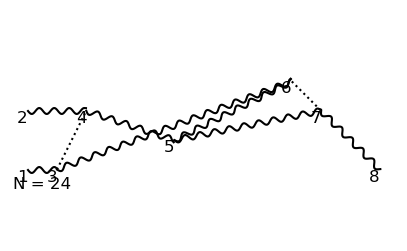

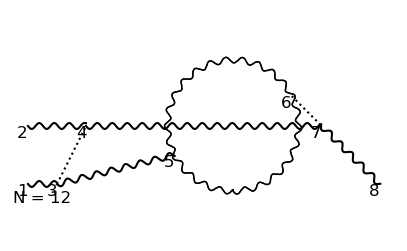

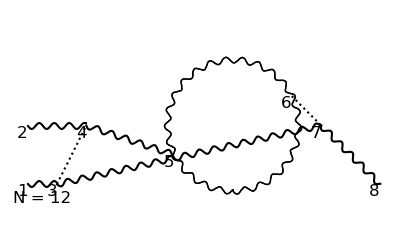

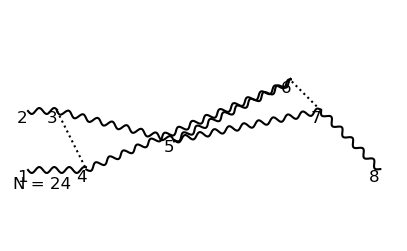

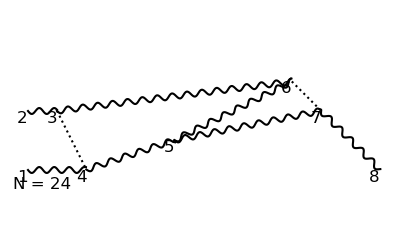

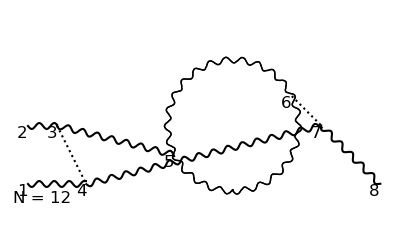

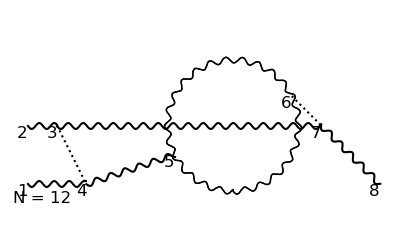

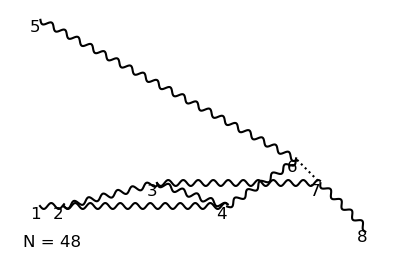

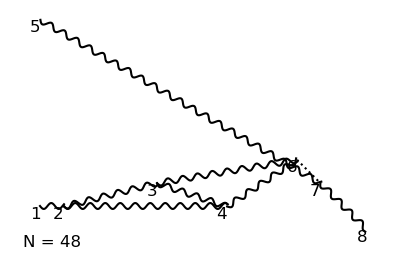

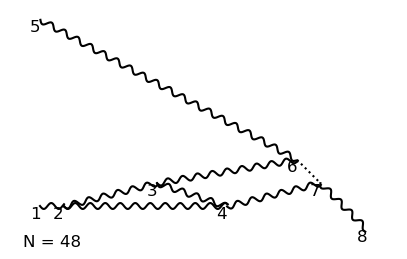

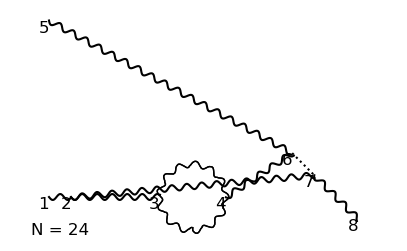

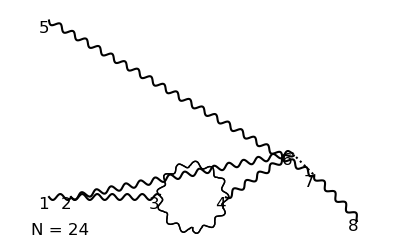

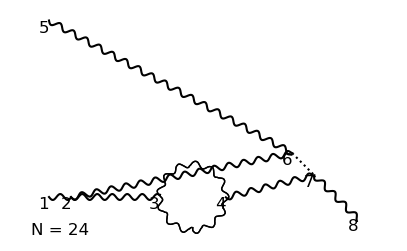

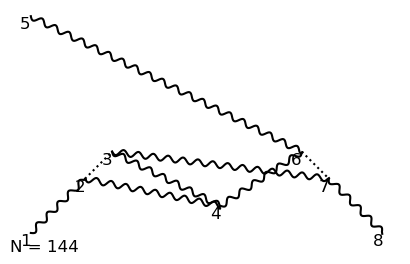

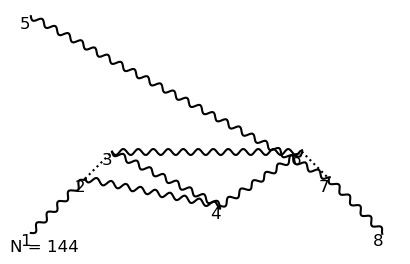

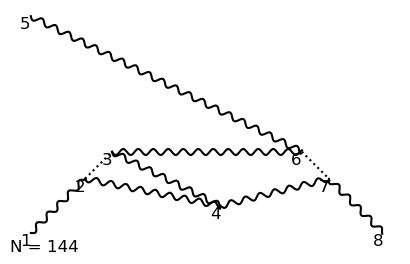

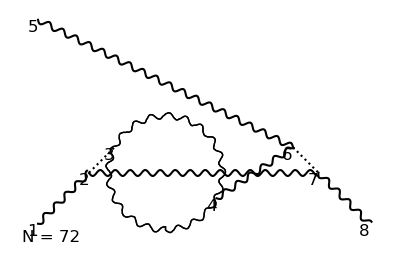

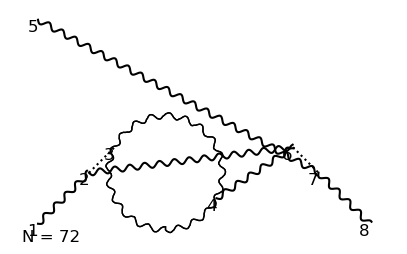

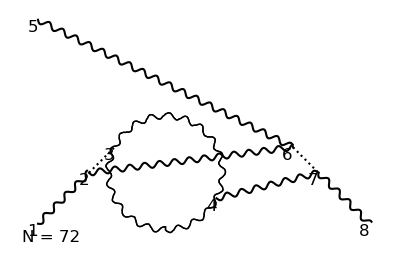

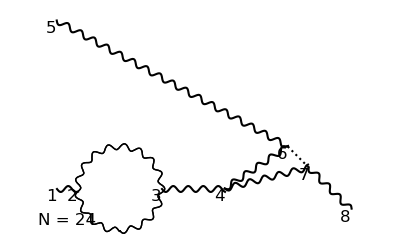

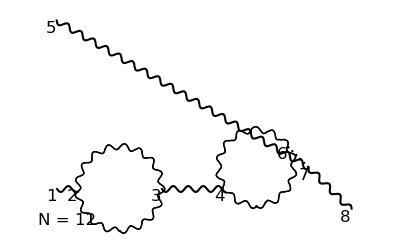

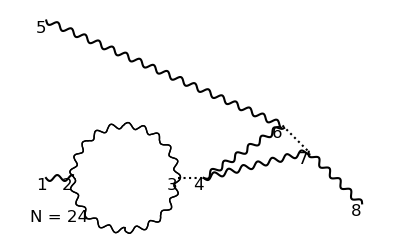

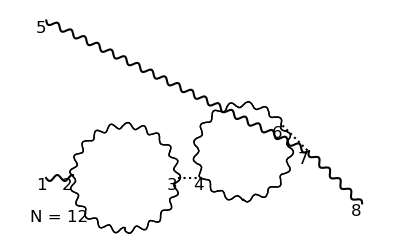

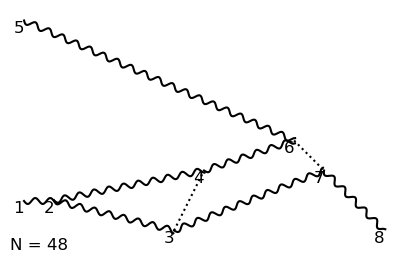

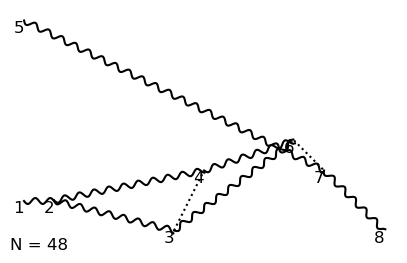

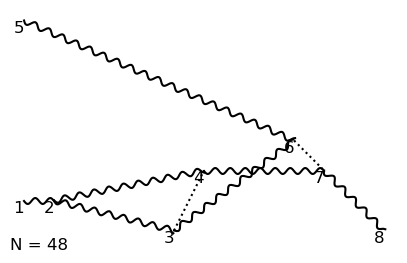

In [10]:
for i in range(len(points5)):
    in_out_paths5 = in_out_paths(paths5[i])
    inp = 0
    out = 0
    for j in range(len(paths3[0])):
        inp += len(np.trim_zeros(in_out_paths5[j, 0]))
        out += len(np.trim_zeros(in_out_paths5[j, 1]))
    if inp == 1 and out == 2:
        points5[i], paths5[i] = detect_superposition(points5[i], paths5[i])
        represent_diagram(reposition_diagram(points5[i], in_out_paths5), paths5[i], index=True, line=["photon", "dotted"], colors=["black", "black"], number=count5[i])    

In [11]:
points_6th, paths_6th, count_6th = combine_diagrams_order([can_points_1st, points2, points3, points4, points5], [can_paths_1st, paths2, paths3, paths4, paths5], [can_number_1st, count2, count3, count4, count5],type_proc, till_order, offset=0)
points6, paths6, count6 = group_diagrams(points_6th, paths_6th, count_6th)

100%|██████████| 1/1 [00:26<00:00, 26.42s/it]


In [12]:
print("from", len(points_6th), "to", len(points6))

from 793440 to 3031


In [17]:
for i in range(len(points6)):
    in_out_paths6 = in_out_paths(paths6[i])
    inp = 0
    out = 0
    for j in range(len(paths3[0])):
        inp += len(np.trim_zeros(in_out_paths6[j, 0]))
        out += len(np.trim_zeros(in_out_paths6[j, 1]))
    if inp == 2 and out == 2:
        points6[i], paths6[i] = detect_superposition(points6[i], paths6[i])
        represent_diagram(reposition_diagram(points6[i], in_out_paths6), paths6[i], index=True, line=["photon", "dotted"], colors=["black", "black"], number=count6[i], directory=f"diagrams/order6_2to2/{i}")